In [1]:
library("FactoMineR")
library("factoextra")
library(ggplot2)
library(ggdark)

df = read.table("datatran2019.csv",sep=";",encoding='latin1', header=TRUE)

str(df)
summary(df)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



'data.frame':	67446 obs. of  30 variables:
 $ id                    : num  182210 182211 182212 182214 182215 ...
 $ data_inversa          : Factor w/ 365 levels "2019-01-01","2019-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ dia_semana            : Factor w/ 7 levels "domingo","quarta-feira",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ horario               : Factor w/ 1302 levels "00:00:00","00:01:00",..: 75 75 37 1 52 89 75 42 115 108 ...
 $ uf                    : Factor w/ 27 levels "AC","AL","AM",..: 26 18 24 6 11 24 12 9 9 23 ...
 $ br                    : int  116 373 101 20 381 470 163 50 60 386 ...
 $ km                    : Factor w/ 7918 levels "0","0,1","0,2",..: 1420 965 774 3682 2607 3588 6456 2101 912 6530 ...
 $ municipio             : Factor w/ 1767 levels "ABADIA DE GOIAS",..: 669 1254 615 592 1065 616 473 386 627 196 ...
 $ causa_acidente        : Factor w/ 24 levels "Agressão Externa",..: 11 11 2 16 11 16 2 9 10 14 ...
 $ tipo_acidente         : Factor w/ 16 levels "Atropelamento de An

       id             data_inversa           dia_semana        horario     
 Min.   :182210   2019-12-21:  298   domingo      :11298   19:00:00:  983  
 1st Qu.:202254   2019-12-07:  268   quarta-feira : 8374   18:00:00:  930  
 Median :221578   2019-09-08:  257   quinta-feira : 8755   18:30:00:  920  
 Mean   :221685   2019-06-09:  255   sábado       :11099   19:30:00:  773  
 3rd Qu.:241146   2019-07-05:  254   segunda-feira: 9134   16:00:00:  744  
 Max.   :266627   2019-12-15:  254   sexta-feira  :10381   17:00:00:  743  
                  (Other)   :65860   terça-feira  : 8405   (Other) :62353  
       uf              br              km            municipio    
 MG     : 8720   Min.   : 10.0   1      :  305   CURITIBA : 1094  
 SC     : 8428   1st Qu.:101.0   3      :  286   BRASILIA : 1090  
 PR     : 7708   Median :163.0   2      :  258   SAO JOSE :  819  
 RJ     : 4606   Mean   :215.3   5      :  240   GUARULHOS:  717  
 RS     : 4595   3rd Qu.:343.0   4      :  235   SERRA   

In [2]:
df.util = df[c(2:4,9:16)]

df.mini <- df.util[(df.util$causa_acidente == "Falta de Atenção à Condução" |
                    df.util$causa_acidente == "Desobediência às normas de trânsito pelo condutor" |
                    df.util$causa_acidente == "ingestão de Álcool" |
                    df.util$causa_acidente == "Velocidade Incompatível" |
                    df.util$causa_acidente == "Não guardar distância de segurança" |
                    df.util$causa_acidente == "Defeito Mecânico no Veículo"
                   ),]

df.mini <- df.util[(df.util$tipo_acidente == "Colisão traseira" |
                    df.util$tipo_acidente == "Colisão transversal" | 
                    df.util$tipo_acidente == "Colisão lateral" |
                    df.util$tipo_acidente == "Saída de leito carroçável" |
                    df.util$tipo_acidente == "Colisão frontal" |
                    df.util$tipo_acidente == "Tombamento" |
                    df.util$tipo_acidente == "Colisão com objeto estático"
                   ),]

df.mini <- na.omit(df.mini)

str(df.mini)
summary(df.mini)

'data.frame':	54561 obs. of  11 variables:
 $ data_inversa          : Factor w/ 365 levels "2019-01-01","2019-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ dia_semana            : Factor w/ 7 levels "domingo","quarta-feira",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ horario               : Factor w/ 1302 levels "00:00:00","00:01:00",..: 75 75 37 1 52 89 42 108 96 104 ...
 $ causa_acidente        : Factor w/ 24 levels "Agressão Externa",..: 11 11 2 16 11 16 9 14 9 14 ...
 $ tipo_acidente         : Factor w/ 16 levels "Atropelamento de Animal",..: 5 9 5 5 8 15 8 6 6 6 ...
 $ classificacao_acidente: Factor w/ 3 levels "Com Vítimas Fatais",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ fase_dia              : Factor w/ 4 levels "Amanhecer","Anoitecer",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ sentido_via           : Factor w/ 3 levels "Crescente","Decrescente",..: 1 1 2 2 2 2 2 2 1 2 ...
 $ condicao_metereologica: Factor w/ 10 levels "Céu Claro","Chuva",..: 1 8 1 8 8 1 1 8 2 1 ...
 $ tipo_pista            : Factor w/ 3 levels "Dupla","

     data_inversa           dia_semana       horario     
 2019-12-21:  248   domingo      :9095   19:00:00:  744  
 2019-04-07:  216   quarta-feira :6764   18:00:00:  728  
 2019-07-20:  214   quinta-feira :7097   18:30:00:  678  
 2019-11-15:  214   sábado       :9049   17:00:00:  619  
 2019-09-08:  213   segunda-feira:7333   16:00:00:  610  
 2019-12-08:  210   sexta-feira  :8489   19:30:00:  607  
 (Other)   :53246   terça-feira  :6734   (Other) :50575  
                                           causa_acidente 
 Falta de Atenção à Condução                      :22065  
 Desobediência às normas de trânsito pelo condutor: 7632  
 Velocidade Incompatível                          : 5248  
 Ingestão de Álcool                               : 4703  
 Não guardar distância de segurança               : 3712  
 Condutor Dormindo                                : 2262  
 (Other)                                          : 8939  
                     tipo_acidente           classificacao_acide

- Os dias que mais acoteceram acidentes foram em desembro 
- Domingo, sabado e sexta-feira são os dias que mais ocorrem acidentes, sendo terca quarta e quinta os que menos ocorrem
- O estado que mais ocorre acidentes é MG e SC
- Quase Metade dos casos são por Falta de Atenção à Condução
- A maior parte dos acidentes acontece em Retas

In [3]:

df.mca = MCA(df.mini,graph=FALSE,quali.sup=c(1:4,7:11),ncp=7)

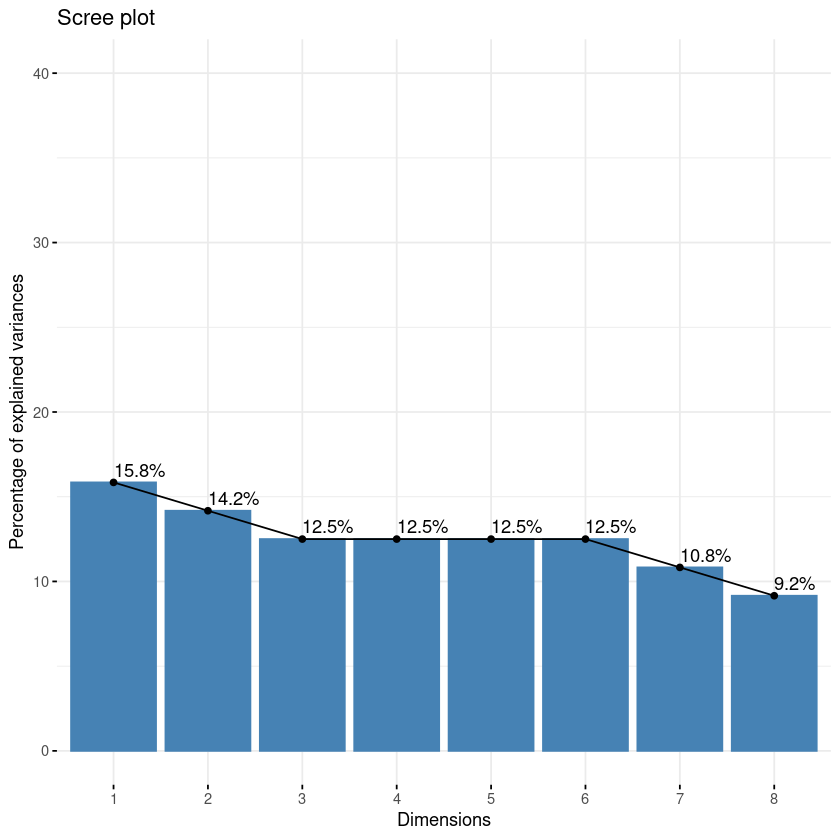

In [4]:
eig.val <- get_eigenvalue(df.mca)

fviz_eig(df.mca, addlabels = TRUE, ylim = c(0, 40)) + dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14) + 

theme(plot.title = element_text(family = "Fira Sans Condensed"),
        plot.background = element_rect(fill = "grey10"),
        panel.background = element_blank(),
        panel.grid.major = element_line(color = "grey30", size = 0.2),
        panel.grid.minor = element_line(color = "grey30", size = 0.2),
        legend.background = element_blank(),
        axis.ticks = element_blank(),
        legend.key = element_blank(),
        legend.position = c(0.815, 0.27))

In [ ]:
f1 = fviz_mca_var(df.mca, repel = TRUE, invisible="quali.sup",col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),)

f1 = f1 + labs(title = "Análise de acidentes de trânsito")

f1 + dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14) + 

theme(plot.title = element_text(family = "Fira Sans Condensed"),
        plot.background = element_rect(fill = "grey10"),
        panel.background = element_blank(),
        panel.grid.major = element_line(color = "grey30", size = 0.2),
        panel.grid.minor = element_line(color = "grey30", size = 0.2),
        legend.background = element_blank(),
        axis.ticks = element_blank(),
        legend.key = element_blank(),
        legend.position = c(0.815, 0.27))

In [ ]:
res.hcpc <- HCPC(df.mca, graph = FALSE)

In [ ]:
fviz_cluster(res.hcpc, geom = "point", main = "Factor map")